<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


In [157]:
# Write your code here or you can add this a markdown cell.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [158]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("simpleparadox/bostonhousingdataset")
print("Path to dataset files:", path)
csv_path = os.path.join(path, 'boston-housing-dataset.csv')
boston_data = pd.read_csv(csv_path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\simpleparadox\bostonhousingdataset\versions\1


In [159]:
boston_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We noticed that there was a an Unnamed column and got it removed in the next line of code

In [160]:
boston_newdata = boston_data.drop(columns=['Unnamed: 0'])
boston_newdata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Our dataset hs 506 rows and 14 columns now 

In [161]:
# Write your code here or you can add this a markdown cell.
boston_newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Based off the information obtained from our dataset we have no null values and we have 12 floats and 2 ints


In [162]:
boston_newdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


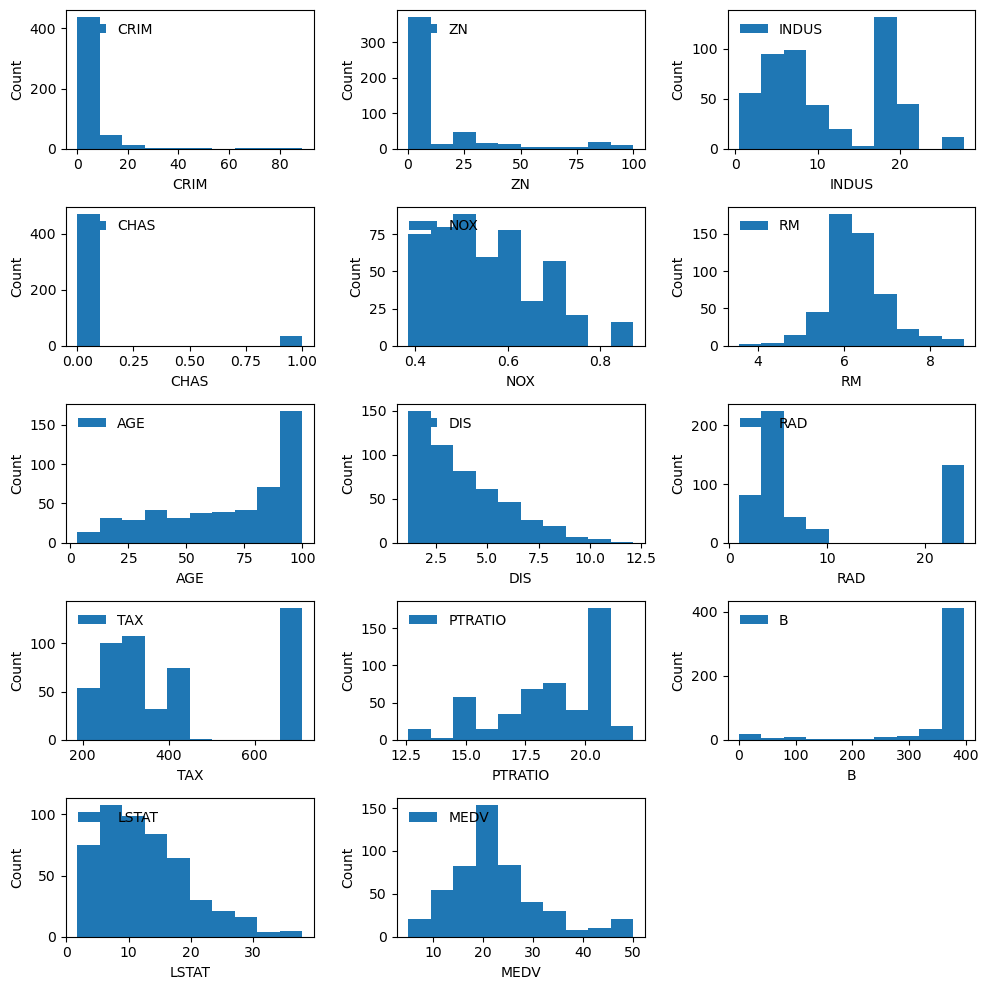

In [163]:
ncols = 3

n_features = len(boston_newdata.columns)
nrows = int(np.ceil(n_features / float(ncols)))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Make axes a flat array, even if there is only 1 row/col
axes = np.array(axes).ravel()

for idx, ax in enumerate(axes):
    if idx < n_features:
        col_name = boston_newdata.columns[idx]
        ax.hist(
            boston_newdata[col_name],
            bins=10,
            # density=True      # uncomment if you really want PDF
        )
        ax.set_xlabel(col_name)   # more informative than just 'x'
        ax.set_ylabel('Count')    # or 'PDF' if using density=True
        leg = ax.legend([col_name], loc='upper left')
        leg.set_frame_on(False)
    else:
        ax.set_axis_off()

plt.tight_layout()
plt.show()

We defined our target as MEDV and in the next line we are going to proceed to the splitting of the dataset

In [179]:
X_data = boston_newdata.drop(columns=['MEDV'])
Y_data = boston_newdata['MEDV'].copy()

In [180]:
Y_data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [181]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(Y_data.values)


NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))

We noticed that the p-value is too small so we have to normalise the Target


In [182]:
from scipy.stats import boxcox
bc_result = boxcox(Y_data)
Y_data = bc_result[0]
lam = bc_result[1]


In [183]:
lam

np.float64(0.21662091178859486)

In [184]:
Y_data

array([4.57293646, 4.36558174, 5.33694285, 5.25495458, 5.42860701,
       4.93592672, 4.48001691, 4.81796339, 3.85654094, 4.10949448,
       3.68340142, 4.10949448, 4.37457321, 4.25505563, 4.03844843,
       4.20749542, 4.49716765, 3.96522843, 4.23614233, 4.03844843,
       3.50909857, 4.17850818, 3.70724923, 3.62267302, 3.75421681,
       3.54759414, 3.86763831, 3.6593032 , 4.05896266, 4.31093724,
       3.38947467, 3.62267302, 3.45672258, 3.44343462, 3.49611889,
       4.10949448, 4.21708176, 4.31093724, 4.63034343, 5.08317372,
       5.34934194, 4.77998175, 4.67854363, 4.63034343, 4.32928643,
       4.14917125, 4.21708176, 3.86763831, 3.61033104, 4.15898968,
       4.18820898, 4.26445786, 4.65455681, 4.52267694, 4.10949448,
       5.38009792, 4.63034343, 5.1372015 , 4.51420246, 4.17850818,
       4.08940891, 3.80025023, 4.41904979, 4.65455681, 5.22922481,
       4.5311231 , 4.15898968, 4.40135427, 3.954582  , 4.30171125,
       4.58947086, 4.37457321, 4.47139751, 4.52267694, 4.58121

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564956, 2.34873723, 2.77182489, 3.19491256, 3.61800022,
        4.04108789, 4.46417555, 4.88726322, 5.31035089, 5.73343855,
        6.15652622]),
 <BarContainer object of 10 artists>)

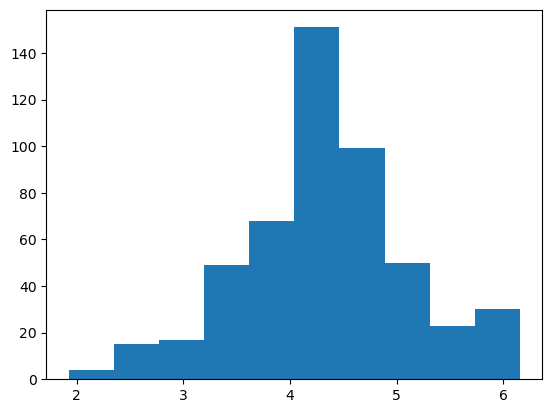

In [185]:
plt.hist(Y_data)

In [186]:
normaltest(Y_data)

NormaltestResult(statistic=np.float64(4.513528743199032), pvalue=np.float64(0.10468867097426256))

Now the p-value is higher it is now closely normalised

## Train Test Split

We split our data into training and testing sets, using 20% of data for testing

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=123)

## Standardize the Data

We standardize features by scaling using StandardScaler

In [188]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)

## Linear Regression

We apply the LinearRegression() model nd fit() our X and y data

In [189]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

#Making predictions we will use the predict() function
X_test=ss.transform(X_test)
medv_pred = lm.predict(X_test)
medv_pred

array([3.4371048 , 4.84973457, 5.67809803, 3.94527982, 4.93092153,
       5.36834391, 4.71667752, 2.96952435, 3.77393492, 5.02990367,
       4.87027564, 4.21439962, 3.58809087, 5.17141239, 3.83379312,
       4.34191777, 4.16348635, 5.44563304, 4.03422941, 3.77249185,
       3.63033723, 4.51158991, 5.21714866, 5.73878959, 5.09041859,
       4.34823652, 3.83461426, 4.36040327, 4.5061835 , 4.17173425,
       4.61264148, 5.31423333, 3.37500132, 4.37665677, 4.54394279,
       5.18233958, 4.9750648 , 3.81015212, 3.67426377, 5.5748354 ,
       5.02464049, 4.08899143, 4.07489621, 5.75440299, 3.16608708,
       4.76130113, 4.20725502, 4.67141766, 3.81611061, 4.3128336 ,
       5.39533691, 4.52075586, 4.23133297, 3.39017553, 4.53291559,
       3.84289226, 3.17209152, 2.5030123 , 5.08654454, 3.54364485,
       4.13659925, 4.40625909, 4.05974469, 3.97280715, 4.62444516,
       4.80950997, 4.70856956, 4.23913944, 4.66928516, 5.00698139,
       4.16191395, 4.87982873, 3.8350808 , 4.59431238, 3.98058

## Model Evaluation

Let's evaluate this model with some statistics. We will use Scikit_Learn's mean_squared_error() function for this evaluation. MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual values using the test data.

In [193]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, medv_pred)
mse

0.14820596267919078

In [194]:
lm.score(X_test,y_test)

0.7343669828106794

In [195]:
r2_score(y_test,medv_pred)

0.7343669828106794

## Creating a polynomial Feature to improve the performance

In [196]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

steps=[('Poly', PolynomialFeatures(degree=2)), ('lm', LinearRegression())]
pipe = Pipeline(steps=steps)

pipe.fit(X_train,y_train)

medv_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, medv_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3074326593471185)

In [197]:
r2_score(y_test,medv_pred)

0.8305988391199796

We notice that the model of which we applied the PolynomialFeature performs better than the model containing just the LinearRegression 

## Regularization

In [198]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [199]:
kf = KFold(shuffle=True, random_state=123, n_splits=3)

Using GridSearchCV we will estimate the best model during the hyperparameter tuning

In [200]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [201]:
grid.fit(X_data, Y_data)

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [202]:
grid.best_score_, grid.best_params_

(np.float64(0.8501351592892377),
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': np.float64(7.237278015274221)})

We notice here that the Best model performance has 85% accuracy, with a polynomialFeature of degree 2 and a ridgeRegression alpha of 7.23727

In [203]:
y_pred = grid.predict(X_data)
r2_score(Y_data, y_pred)

0.9178532677042801

In [204]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        , -0.01117997,  0.00801721,  0.01638425,  0.00905788,
       -0.12474832,  0.22813982, -0.09371814, -0.16129559,  0.11619625,
       -0.10735083, -0.0494491 ,  0.0355507 , -0.28871619,  0.01507236,
        0.00347726,  0.02179639,  0.19316509, -0.12264554,  0.06964687,
       -0.04128656,  0.00179678, -0.08923333,  0.02622038, -0.02120255,
       -0.017979  ,  0.05558882,  0.0043325 , -0.02726197, -0.00491617,
        0.0085915 ,  0.00470616, -0.01786979, -0.01871286, -0.02680835,
        0.08383681,  0.00310137,  0.00375648, -0.01518612,  0.06195769,
        0.00381849,  0.12270396,  0.05012679,  0.0285133 ,  0.09398468,
       -0.00724888,  0.00164664, -0.02057491,  0.05981921, -0.05779359,
        0.03075874, -0.06787774, -0.05712931,  0.0168204 ,  0.03849185,
       -0.01660407,  0.04897555, -0.00704119, -0.01518372, -0.01756731,
       -0.00627654,  0.01597351, -0.06516843,  0.11451494, -0.06505499,
        0.02653105, -0.04388844,  0.01363226,  0.01837728,  0.00

In [206]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.01, 1.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [207]:
grid.fit(X_data, Y_data)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e-01, tolerance: 2.250e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e-01, tolerance: 2.250e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.143e-02, tolerance: 

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [208]:
grid.best_score_, grid.best_params_

(np.float64(0.8237978670294792),
 {'lasso_regression__alpha': np.float64(0.012742749857031334),
  'polynomial_features__degree': 3})

In [209]:
r2_score(Y_data, y_pred)

0.9178532677042801

In [210]:
grid.best_estimator_.named_steps['lasso_regression'].coef_

array([ 0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.1626483 , -0.01056934, -0.        ,  0.        ,
       -0.        , -0.05636752,  0.        , -0.1265789 , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.00265763, -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.04

Copyright @ IBM Corporation. All rights reserved.
